# Problem 3.24
##### a. Make a scatterplot of Y = MMSE versus X = APC and with *Type* as a grouping variable (i.e., use different colors or different plotting symbols for the two levels of *Type*)


note: add a part d (look at assignment 5 instructions)

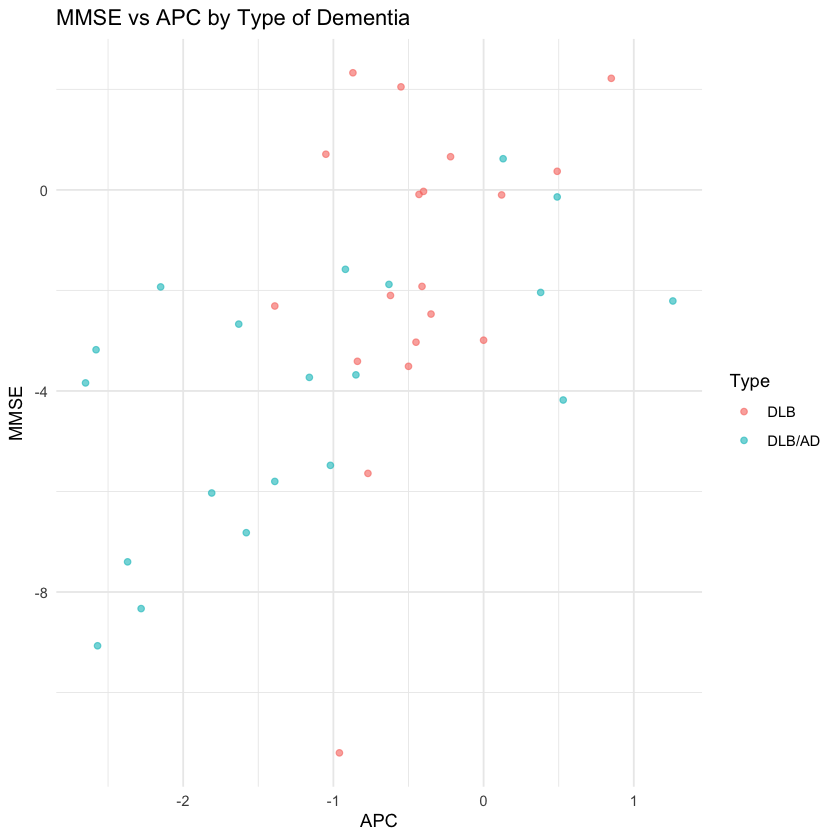

In [ ]:
lewy_data <- read.csv("./data/LewyBody2Groups.csv")

library(ggplot2)

ggplot(lewy_data, aes(x = APC, y = MMSE, color = Type)) +
    geom_point(alpha = 0.6) +
    labs(
        title = "MMSE vs APC by Type of Dementia",
        x = "APC",
        y = "MMSE"
    ) +
    theme_minimal()

There appears to be a positive linear relationship between the two variables with both types, with DLB having a sharper slope. We can see this if we map the data to a linear model for each type and overlay it on our scatterplot:

`geom_smooth()` using formula = 'y ~ x'


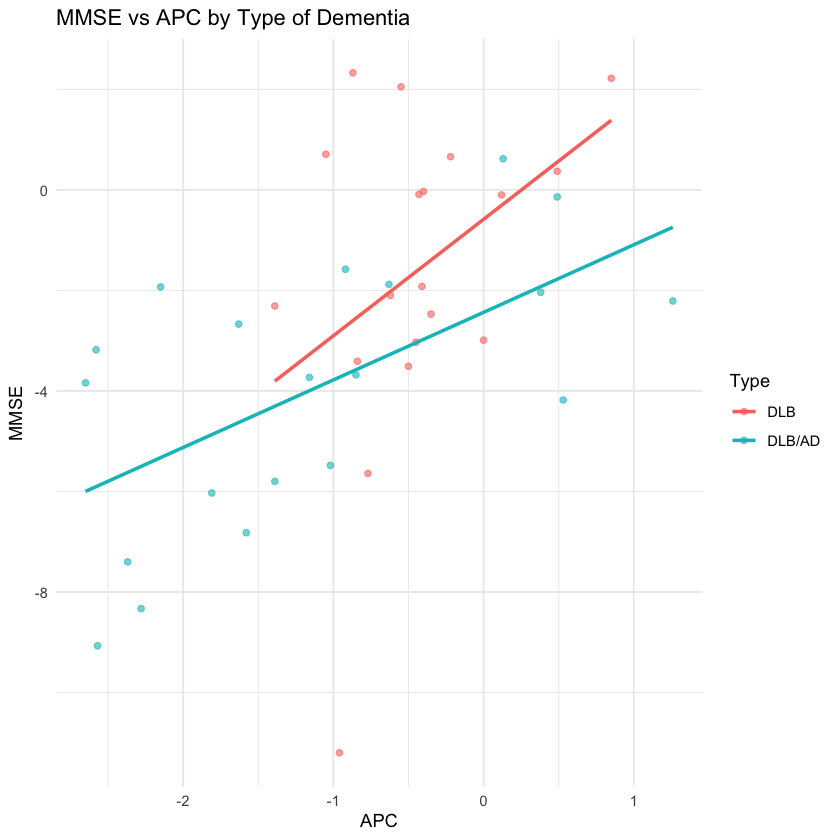

In [3]:
ggplot(lewy_data, aes(x = APC, y = MMSE, color = Type)) +
    geom_point(alpha = 0.6) + 
    geom_smooth(method = "lm", se = FALSE) +
    labs(
        title = "MMSE vs APC by Type of Dementia",
        x = "APC",
        y = "MMSE"
    ) +
    theme_minimal()

##### b. Fit the regression of MMSE on APC and test whether there is a linear association between the two variables

We can use a linear model to fit the regression of MMSE on APC, and then apply a test of correlation to both variables to assess the strength of the relationship:

In [4]:
model <- lm(MMSE ~ APC, data = lewy_data)
summary(model)

cor.test(lewy_data$MMSE, lewy_data$APC)


Call:
lm(formula = MMSE ~ APC, data = lewy_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1022 -1.7043  0.2174  1.9484  5.2706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4214     0.5528  -2.572 0.014277 *  
APC           1.7462     0.4401   3.968 0.000321 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.664 on 37 degrees of freedom
Multiple R-squared:  0.2985,	Adjusted R-squared:  0.2795 
F-statistic: 15.74 on 1 and 37 DF,  p-value: 0.0003208



	Pearson's product-moment correlation

data:  lewy_data$MMSE and lewy_data$APC
t = 3.9675, df = 37, p-value = 0.0003208
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2788694 0.7351198
sample estimates:
      cor 
0.5463171 


Overall, we see that there is a significant posivite linear association between MMSE and APC, and it's a moderately strong one (given by our 0.546 correlation coefficient).

##### c. Fit a model that produces parallel regression lines for the two levels of *Type*. Write down the fitted prediction equation for each level of *Type*.

In [7]:
parallel_model <- lm(MMSE ~ APC + Type, data = lewy_data)
summary(parallel_model)


Call:
lm(formula = MMSE ~ APC + Type, data = lewy_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8153 -1.6382 -0.1469  1.9103  4.5796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.9433     0.6358  -1.484  0.14662   
APC           1.5015     0.4650   3.229  0.00265 **
TypeDLB/AD   -1.3135     0.9017  -1.457  0.15385   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.624 on 36 degrees of freedom
Multiple R-squared:  0.3375,	Adjusted R-squared:  0.3007 
F-statistic:  9.17 on 2 and 36 DF,  p-value: 0.0006042


Using the output above, we see that the slope is 1.5015 for APC, with an intercept of -.9433. The DLB/AD type's intercept is further decreased by 1.3135, with a final intercept of -2.2568. Putting it all together, we get the following prediction equations:

For DLB:
$$ MMSE = -0.9433 + 1.5015(APC)$$

For DLB/AD:
$$ MMSE = -2.2568 + 1.5015(APC)$$

One important observation is that the APC coeffecicient (1.5015) is significant, but the difference between the two levels (DLB vs DLB/AD) is not (.15385)

##### d. Create a model with interaction of the IType variable with the variable APC so that the regression lines can have different slopes and intercepts.


Call:
lm(formula = MMSE ~ APC + Type + APC:Type, data = lewy_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3905 -1.5841 -0.1014  1.6959  4.9309 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -0.5846     0.7927  -0.738   0.4657  
APC              2.3176     1.1640   1.991   0.0543 .
TypeDLB/AD      -1.8513     1.1471  -1.614   0.1155  
APC:TypeDLB/AD  -0.9732     1.2712  -0.766   0.4490  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.64 on 35 degrees of freedom
Multiple R-squared:  0.3484,	Adjusted R-squared:  0.2926 
F-statistic: 6.239 on 3 and 35 DF,  p-value: 0.001656


`geom_smooth()` using formula = 'y ~ x'


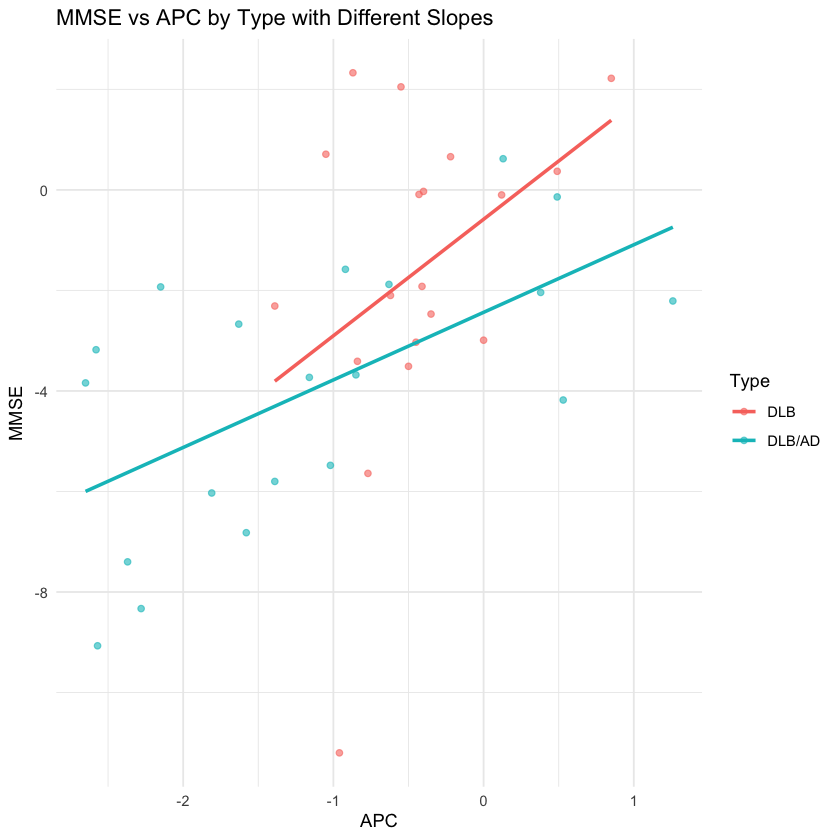

In [8]:
interaction_model <- lm(MMSE ~ APC + Type + APC:Type, data = lewy_data)
summary(interaction_model)

ggplot(lewy_data, aes(x = APC, y = MMSE, color = Type)) +
    geom_point(alpha = 0.6) + 
    geom_smooth(method = "lm", se = FALSE) +
    labs(
        title = "MMSE vs APC by Type with Different Slopes",
        x = "APC",
        y = "MMSE"
    ) +
    theme_minimal()

# Problem 3.38

##### a. Run a quadratic model using Depth


Call:
lm(formula = TotalPrice ~ Depth + Depth_sq, data = diamonds)

Residuals:
   Min     1Q Median     3Q    Max 
 -9323  -4251  -2676   2134  45513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -28406.783 112211.790  -0.253    0.800
Depth          766.369   3353.222   0.229    0.819
Depth_sq        -3.233     24.869  -0.130    0.897

Residual standard error: 7616 on 348 degrees of freedom
Multiple R-squared:  0.04748,	Adjusted R-squared:  0.042 
F-statistic: 8.673 on 2 and 348 DF,  p-value: 0.0002111


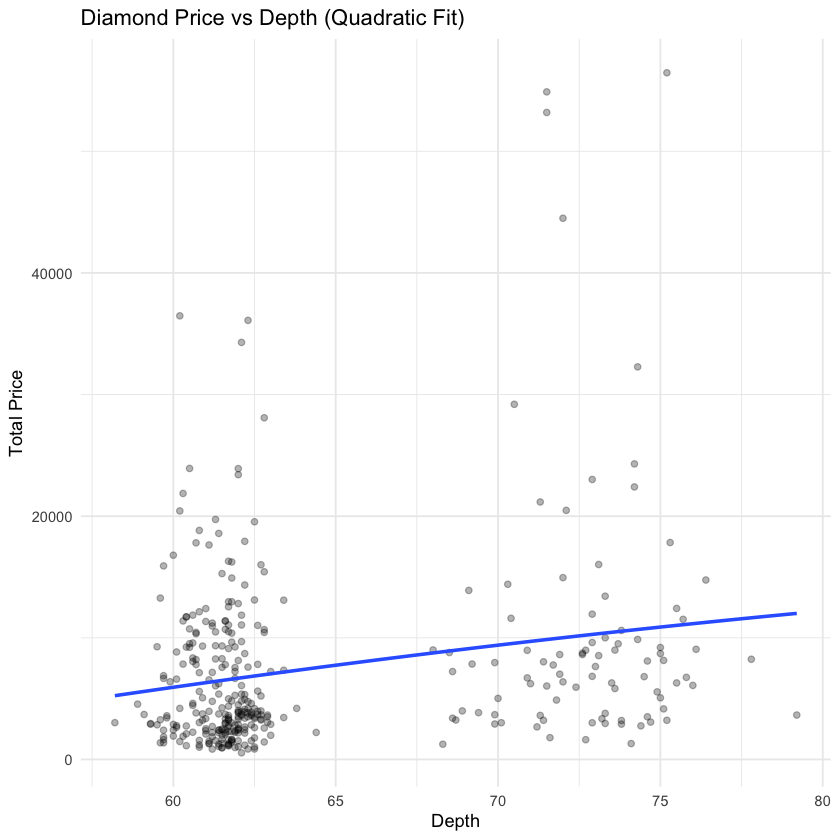

In [10]:
diamonds <- read.csv("./data/Diamonds.csv")
diamonds$Depth_sq <- diamonds$Depth^2

quad_model <- lm(TotalPrice ~ Depth + Depth_sq, data = diamonds)
summary(quad_model)

ggplot(diamonds, aes(x = Depth, y = TotalPrice)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
    labs(
        title = "Diamond Price vs Depth (Quadratic Fit)",
        x = "Depth",
        y = "Total Price"
    ) +
    theme_minimal()

$R^2$ = 0.04748

Adjusted $R^2$ = 0.042

Neither depth (p=.819) nor $depth^2$ (p=.897) are statistically significant.

##### b. A two-predictor model using Carat and Depth


Call:
lm(formula = TotalPrice ~ Carat + Depth, data = diamonds)

Residuals:
    Min      1Q  Median      3Q     Max 
-9234.7 -1223.7  -274.3  1161.0 16368.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1059.24    1918.36   0.552    0.581    
Carat       15087.01     320.96  47.006  < 2e-16 ***
Depth        -134.94      30.92  -4.364 1.68e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2809 on 348 degrees of freedom
Multiple R-squared:  0.8704,	Adjusted R-squared:  0.8696 
F-statistic:  1168 on 2 and 348 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


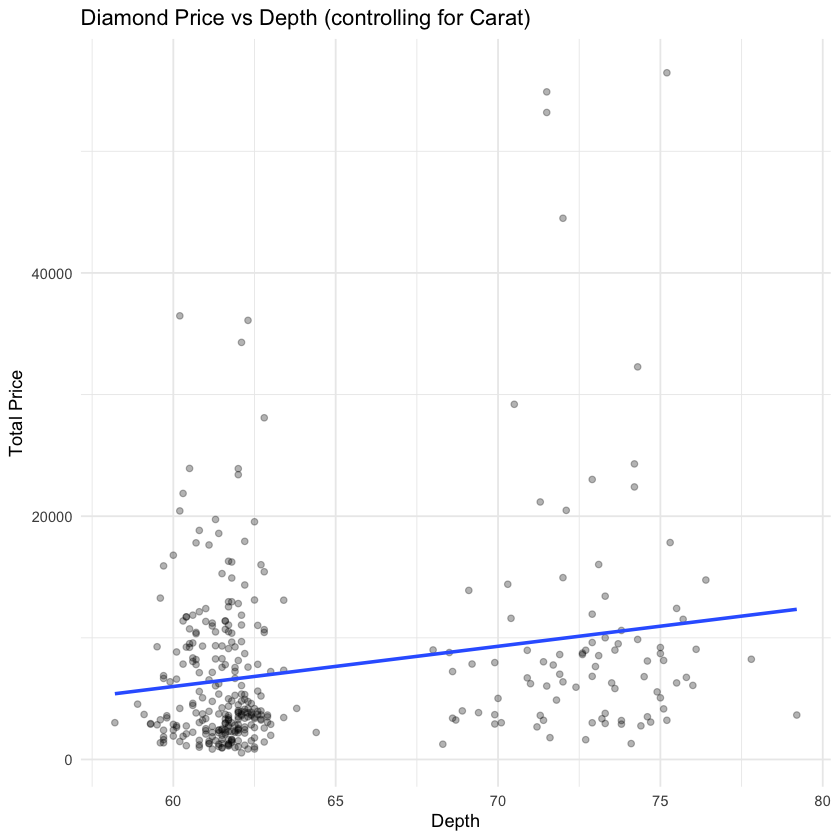

In [13]:
two_pred_model <- lm(TotalPrice ~ Carat + Depth, data = diamonds)
summary(two_pred_model)

ggplot(diamonds, aes(x = Depth, y = TotalPrice)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method = "lm", se = FALSE) +
    labs(
        title = "Diamond Price vs Depth (controlling for Carat)",
        x = "Depth",
        y = "Total Price"
    ) +
    theme_minimal()


$R^2$ = 0.8704

Adjusted $R^2$ = 0.8696

This is statistically significant model, with an F-statistic p-value < 2.2e-16. Additionally, unlike with the quadratic model, our coeffcients are statistically significant:

Carat: < 2e-16

Depth: < 1.68e-05

This model performs considerably better than the quadratic model that used just depth, ($R^2$ increases from .046 to .87), and we note that carat has a much stronger effect on price than depth. 

##### c. A three-predictor model that adds interaction for *Carat* and *Depth*




Call:
lm(formula = TotalPrice ~ Carat + Depth + Carat:Depth, data = diamonds)

Residuals:
    Min      1Q  Median      3Q     Max 
-8254.4 -1311.5  -157.2  1131.8 14513.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31171.41    4219.58   7.387 1.13e-12 ***
Carat       -11827.73    3436.47  -3.442 0.000648 ***
Depth         -598.18      65.47  -9.137  < 2e-16 ***
Carat:Depth    408.45      51.96   7.861 4.84e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2592 on 347 degrees of freedom
Multiple R-squared:   0.89,	Adjusted R-squared:  0.889 
F-statistic: 935.7 on 3 and 347 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


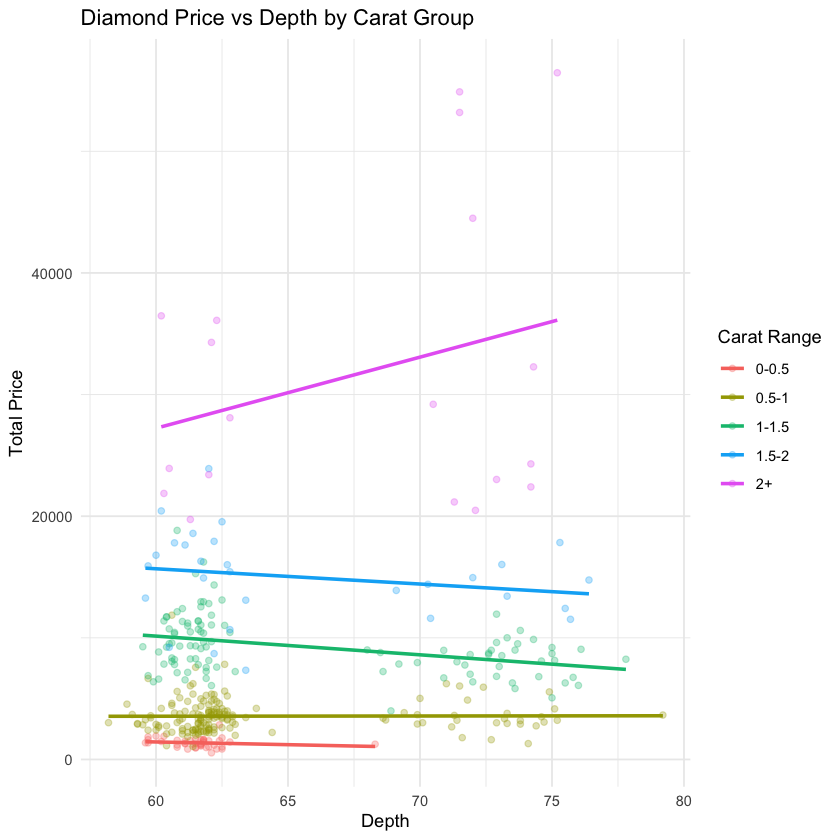

In [14]:
interaction_model <- lm(TotalPrice ~ Carat + Depth + Carat:Depth, data = diamonds)
summary(interaction_model)

diamonds$CaratGroup <- cut(diamonds$Carat, 
                         breaks = c(0, 0.5, 1, 1.5, 2, max(diamonds$Carat)),
                         labels = c("0-0.5", "0.5-1", "1-1.5", "1.5-2", "2+"))

ggplot(diamonds, aes(x = Depth, y = TotalPrice, color = CaratGroup)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method = "lm", se = FALSE) +
    labs(
        title = "Diamond Price vs Depth by Carat Group",
        x = "Depth",
        y = "Total Price",
        color = "Carat Range"
    ) +
    theme_minimal()


$R^2$ = 0.89

Adjusted $R^2$ = 0.889

This is statistically significant model, with an F-statistic p-value < 2.2e-16. Additionally, unlike with the quadratic model and like with our two-predictor model, all of our coeffecients are statistically significant:

Carat: .000648

Depth: < 2e-16

Carat:Depth: 4.84e-14

The interaction term between Carat and Depth is $408 per unit of both carat and depth, which suggests that depth becomes more important as carat increases. This model also performs slightly better than the two predictor model (89% of the variation explained, vs 87%).

##### d. A complete second-order model using Carat and Depth


Call:
lm(formula = TotalPrice ~ Carat + Depth + Carat:Depth + Carat_sq + 
    Depth_sq, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-12196.1   -652.7    -38.5    485.7  10582.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24338.820  30297.912   0.803   0.4223    
Carat        7573.620   3040.787   2.491   0.0132 *  
Depth        -728.700    904.439  -0.806   0.4210    
Carat_sq     4761.592    330.246  14.418   <2e-16 ***
Depth_sq        5.276      6.727   0.784   0.4333    
Carat:Depth   -83.891     53.530  -1.567   0.1180    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2053 on 345 degrees of freedom
Multiple R-squared:  0.9313,	Adjusted R-squared:  0.9304 
F-statistic: 936.1 on 5 and 345 DF,  p-value: < 2.2e-16


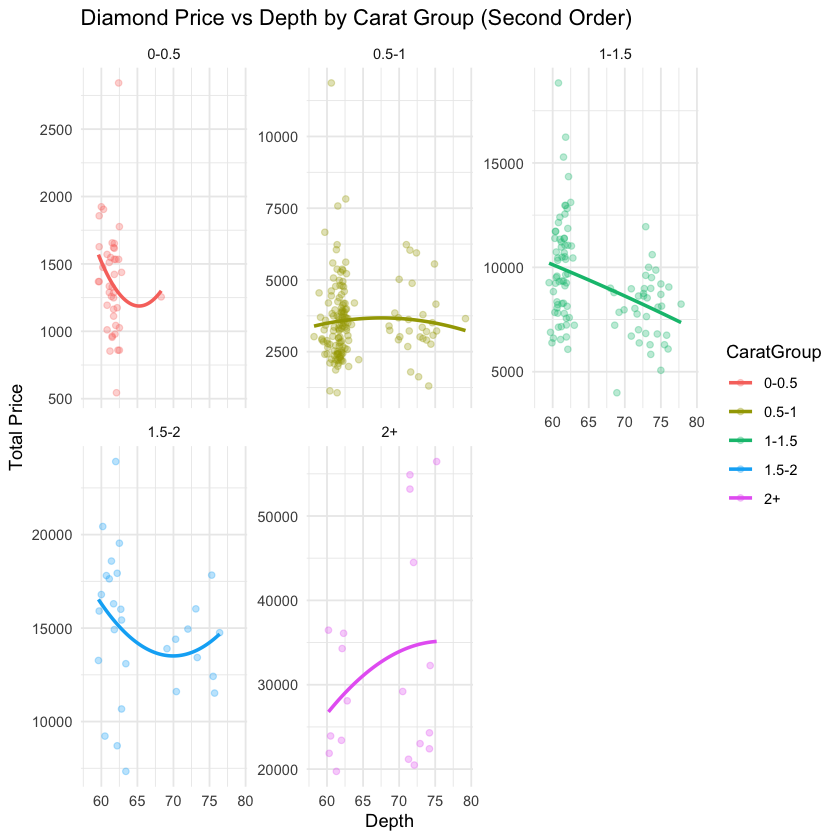

In [15]:
diamonds$Carat_sq <- diamonds$Carat^2
diamonds$Depth_sq <- diamonds$Depth^2

complete_model <- lm(TotalPrice ~ Carat + Depth + Carat:Depth + Carat_sq + Depth_sq, data = diamonds)
summary(complete_model)

ggplot(diamonds, aes(x = Depth, y = TotalPrice, color = CaratGroup)) +
    geom_point(alpha = 0.3) +
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
    facet_wrap(~CaratGroup, scales = "free_y") +
    labs(
        title = "Diamond Price vs Depth by Carat Group (Second Order)",
        x = "Depth",
        y = "Total Price"
    ) +
    theme_minimal()

$R^2$ = 0.913

Adjusted $R^2$ = 0.9304

Again, this is a significant model overall (F=936.1, p < 2.2e-16)

Carat: 0.0132 (significant)

Depth: .4210 (not significant)

$Carat^2$ = < 2e-16 (significant)

$Depth^2$ = .4333 (not significant) 

Carat x Depth = .118 (not significant)

This model performs the best out of all the models so far (explaning 93% of Total Price). It also suggests that depth is not nearly as important as other models have shown, and the interaction with carat is no longer signicant when controlling for squared terms. I would recommend this model for predicting the total price of diamonds, as it provides the best fit while only increasing complexity modestly.


# Problem 3.39

##### a. Using the model you chose, produce one or more graphs to examine the conditions for homoscedasticity and normality of its residuals. Do these standard regression conditions appear to be reasonable for your model?

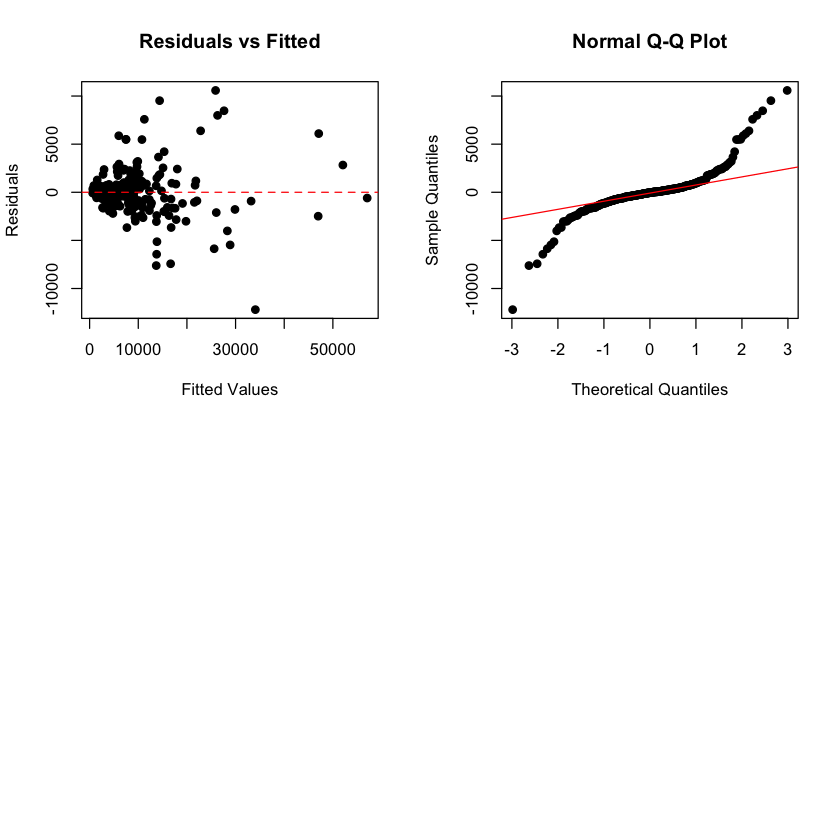

In [16]:
residuals <- resid(complete_model)
fitted_values <- fitted(complete_model)

par(mfrow=c(2,2))

plot(fitted_values, residuals,
     xlab="Fitted Values",
     ylab="Residuals",
     main="Residuals vs Fitted",
     pch=19)
abline(h=0, col="red", lty=2)

qqnorm(residuals, pch=19)
qqline(residuals, col="red")

Our residuals vs fitted plot shows a fanning pattern moving right, indicating larger residuals for higher fited values, which suggests some violation of the constant variance assumption. Our QQ plot has relatively good alignment toward the middle, but there are deviations in the tails, particularly at the higher end, which suggests a slight departure from normality.

##### b. Transform the response variable to be *logPrice* as the natural log of the *TotalPrice*. Is your "best" choice of models still a reasonable choice for predicting *logPrice*? If not, make adjustments to add or delete terms, keeping with the options offered within a complete second-order model.


Call:
lm(formula = logPrice ~ Carat + Depth + Carat:Depth + Carat_sq + 
    Depth_sq, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85021 -0.13209  0.01441  0.13613  0.79710 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.5049624  3.4020467   3.970 8.76e-05 ***
Carat        2.5863485  0.3414393   7.575 3.33e-13 ***
Depth       -0.2027689  0.1015563  -1.997   0.0467 *  
Carat_sq    -0.5714071  0.0370821 -15.409  < 2e-16 ***
Depth_sq     0.0013384  0.0007553   1.772   0.0773 .  
Carat:Depth  0.0095943  0.0060107   1.596   0.1114    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2306 on 345 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9292 
F-statistic: 919.9 on 5 and 345 DF,  p-value: < 2.2e-16



Call:
lm(formula = logPrice ~ Carat + Carat_sq, data = diamonds)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8215 -0.1313  0.0003  0.1391  0.8615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.13042    0.05218  117.48   <2e-16 ***
Carat        3.05963    0.08422   36.33   <2e-16 ***
Carat_sq    -0.52730    0.02944  -17.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.238 on 348 degrees of freedom
Multiple R-squared:  0.925,	Adjusted R-squared:  0.9246 
F-statistic:  2146 on 2 and 348 DF,  p-value: < 2.2e-16


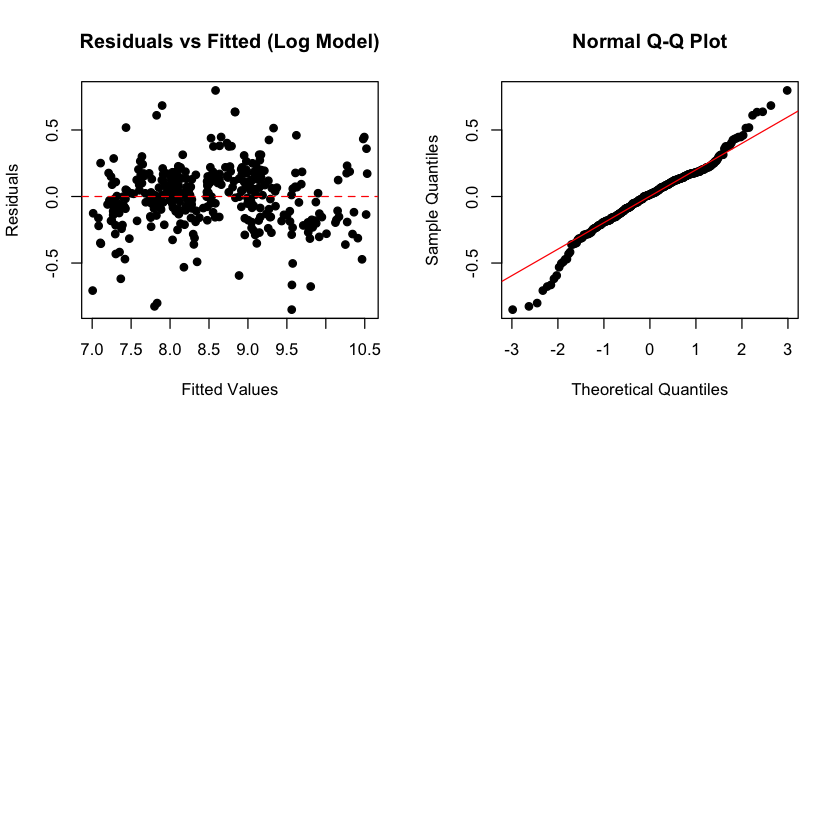

In [19]:
diamonds$logPrice <- log(diamonds$TotalPrice)

log_complete_model <- lm(logPrice ~ Carat + Depth + Carat:Depth + Carat_sq + Depth_sq, data = diamonds)
summary(log_complete_model)

residuals <- resid(log_complete_model)
fitted_values <- fitted(log_complete_model)

par(mfrow=c(2,2))

plot(fitted_values, residuals,
     xlab="Fitted Values",
     ylab="Residuals",
     main="Residuals vs Fitted (Log Model)",
     pch=19)
abline(h=0, col="red", lty=2)

qqnorm(residuals, pch=19)
qqline(residuals, col="red")

# simpler model without the insignifcant terms
log_reduced_model <- lm(logPrice ~ Carat + Carat_sq, data = diamonds)
summary(log_reduced_model)

Looking at the logPrice model, the model fit hasn't changed all that much, but the log transformatino does seem to improve homoscedasticity and normality. 

##### c. Once you have settled on a model for logPrice, produce similar graphs to those you found in (a). Has the log transformation helped with either the constant variance or normality conditions on the residuals?

Yes, the log transformation has helped with both, while retaining the fit of the model. Given the insignificance in interaction between carat and depth, I think we can fit a reduced model that leaves out the interaction while still factoring in the logPrice and squares of each of the carat and depth:


Call:
lm(formula = logPrice ~ Carat + Depth + Carat_sq + Depth_sq, 
    data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85847 -0.11996  0.01404  0.13568  0.80447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.2641471  3.4062935   3.894 0.000118 ***
Carat        3.1151846  0.0827330  37.653  < 2e-16 ***
Depth       -0.2043145  0.1017786  -2.007 0.045480 *  
Carat_sq    -0.5336499  0.0286216 -18.645  < 2e-16 ***
Depth_sq     0.0014319  0.0007547   1.897 0.058616 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2311 on 346 degrees of freedom
Multiple R-squared:  0.9297,	Adjusted R-squared:  0.9289 
F-statistic:  1144 on 4 and 346 DF,  p-value: < 2.2e-16


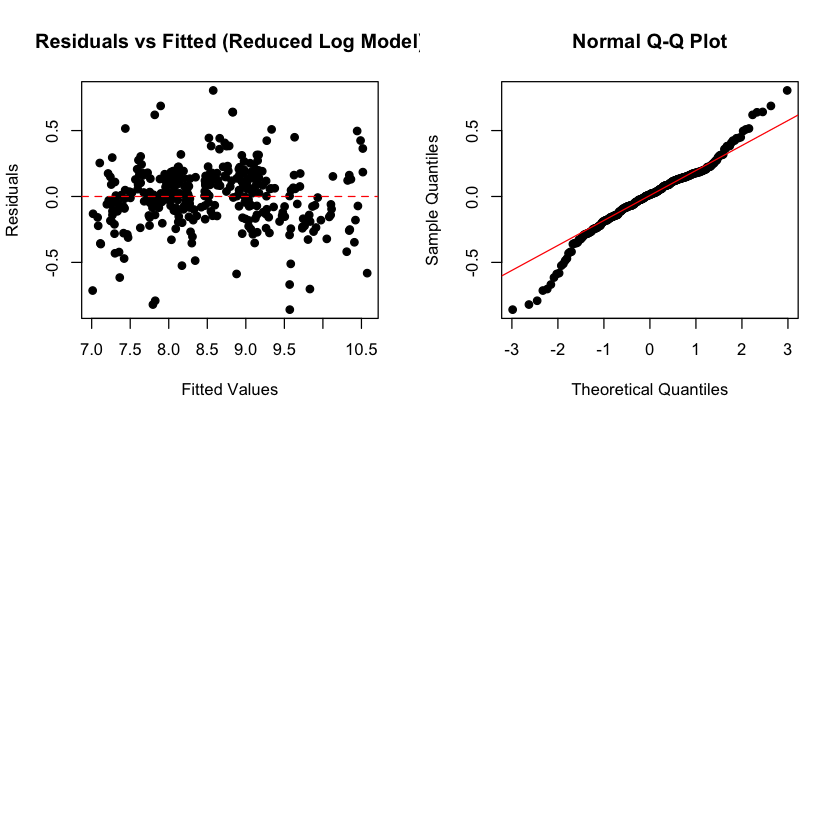

In [20]:
log_reduced_model <- lm(logPrice ~ Carat + Depth + Carat_sq + Depth_sq, 
                       data = diamonds)
summary(log_reduced_model)

par(mfrow=c(2,2))
plot(fitted(log_reduced_model), resid(log_reduced_model),
     xlab="Fitted Values",
     ylab="Residuals",
     main="Residuals vs Fitted (Reduced Log Model)",
     pch=19)
abline(h=0, col="red", lty=2)

qqnorm(resid(log_reduced_model), pch=19)
qqline(resid(log_reduced_model), col="red")

# Problem 3.40

##### a. What average total price does the quadratic model predict for a .5-carat diamond?


In [22]:
new_diamond <- data.frame(Carat = 0.5, Depth = mean(diamonds$Depth))
new_diamond$Carat_sq <- new_diamond$Carat^2

quad_model <- lm(TotalPrice ~ Carat + Carat_sq, data = diamonds)

predicted_price <- predict(quad_model, newdata = new_diamond)
print(predicted_price)

       1 
1794.843 


##### b. Find a 95% confidence interval for the mean total price of .5-carat diamonds. Write a sentence interpreting the interval in terms that will make sense to the young couple.



In [23]:
ci <- predict(quad_model, newdata = new_diamond, interval = "confidence", level = 0.95)
print(ci)

       fit      lwr      upr
1 1794.843 1424.296 2165.389


We can 95% confident that the average price for a .5 carat diamond falls between $1424 and $2165. Stated differently, while the price of a specific .5 carat diamond may cost more or less depending on their specific attributes, the true average price is very likely to fall between $1424 and $2165.

##### c. Find a 95% prediction interval for the total price when a diamond weighs .5 carat. Write a sentence interpreting the interval in terms that will make sense to the young couple.

In [24]:
pred_int <- predict(quad_model, newdata = new_diamond, interval = "prediction", level = 0.95)
print(pred_int)

       fit       lwr      upr
1 1794.843 -2404.462 5994.147


This output is a little bit tougher to interpret, since -2404 isn't meaningful in the real world (i.e., no seller would ever pay you $2400 to take the diamond), but put simply, when shopping for a .5-carat diamond, the young couple should expect that the price for any individual diamond can range from about $0 to about $6000. This wide range is a reflection of the fact that diamonds of the same carat can have their price impacted based on other factors (like cut, color and clarity, i.e., the other 3 Cs (I proposed to my now fiancee last year, and am all too familiar with these traits lol))

##### d. Repeat the previous two intervals (confidence and prediction) for the model found in part (b) of Exercise 3.39, where the response variable was logPrice. You should find the intervals for the log scale, but then exponentiate to give answers in terms of TotalPrice

In [26]:
new_diamond <- data.frame(Carat = 0.5, Depth = mean(diamonds$Depth))
new_diamond$Carat_sq <- new_diamond$Carat^2
new_diamond$Depth_sq <- new_diamond$Depth^2

log_ci <- predict(log_reduced_model, newdata = new_diamond, 
                 interval = "confidence", level = 0.95)
price_ci <- exp(log_ci)
print("95% Confidence Interval for mean price:")
print(price_ci)

log_pred <- predict(log_reduced_model, newdata = new_diamond,
                   interval = "prediction", level = 0.95)
price_pred <- exp(log_pred)
print("95% Prediction Interval for individual price:")
print(price_pred)

[1] "95% Confidence Interval for mean price:"
      fit      lwr      upr
1 1753.62 1656.519 1856.413
[1] "95% Prediction Interval for individual price:"
      fit      lwr      upr
1 1753.62 1109.174 2772.498


Using our reduced log model, we produce a 95% confidence interval of $1656 to $1856 to capture the mean price across all diamonds of .5 carats. We also  produce 95% prediction interval of $1109 to $2772, which is a much more realistic range than our previous model (which included negative prices) of what a specific .5-carat diamond might actually cost.